In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) Load data
df = pd.read_csv("03_Clustering_Marketing.csv")
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cols_10 = ["gradyear","gender","age","NumberOffriends",
           "basketball","football","soccer","music","shopping","drugs"]


df["gender"] = df["gender"].replace({"M":0,"F":1,"m":0,"f":1})
df[cols_10] = df[cols_10].apply(pd.to_numeric, errors="coerce")

df["age"] = df["age"].fillna(df["age"].median())
df["gender"] = df["gender"].fillna(df["gender"].mode()[0] if not df["gender"].isna().all() else 0)
df[cols_10] = df[cols_10].fillna(0)

print(df[cols_10].isnull().sum())  

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
music              0
shopping           0
drugs              0
dtype: int64


C:\Users\USER PC\AppData\Local\Temp\ipykernel_22216\2696424311.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"M":0,"F":1,"m":0,"f":1})


In [11]:
#  Scale
X_scaled = StandardScaler().fit_transform(X)

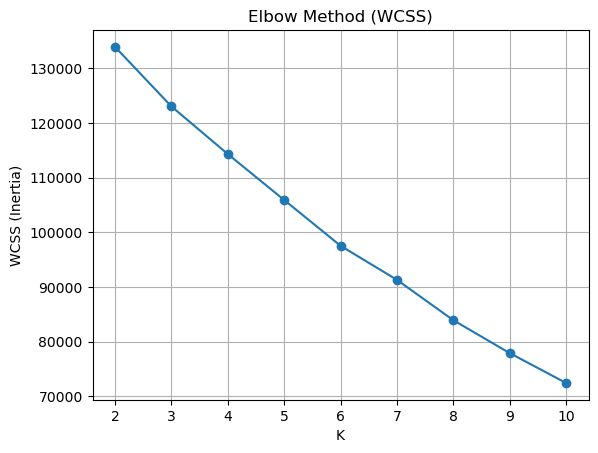

k = 2 | WCSS = 133874.12
k = 3 | WCSS = 122996.98
k = 4 | WCSS = 114287.95
k = 5 | WCSS = 105893.44
k = 6 | WCSS = 97526.78
k = 7 | WCSS = 91301.91
k = 8 | WCSS = 83927.45
k = 9 | WCSS = 77912.05
k = 10 | WCSS = 72453.49

✅ Best K (from WCSS) = 2


In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# WCSS (Elbow)
wcss = []
K_range = list(range(2, 11))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)   # WCSS

# Plot
plt.plot(K_range, wcss, marker='o')
plt.grid(True)
plt.xlabel("K")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method (WCSS)")
plt.show()

# Print WCSS values
for k, val in zip(K_range, wcss):
    print("k =", k, "| WCSS =", round(val, 2))


diffs = np.diff(wcss)      
best_k = K_range[np.argmin(diffs)]

print("\nBest K (from WCSS) =", best_k)


Best K = 2


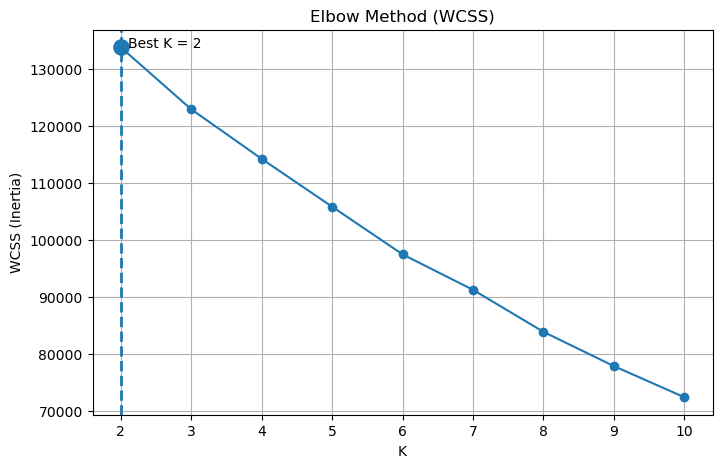

k = 2 | WCSS = 133874.12
k = 3 | WCSS = 122996.98
k = 4 | WCSS = 114287.95
k = 5 | WCSS = 105893.44
k = 6 | WCSS = 97526.78
k = 7 | WCSS = 91301.91
k = 8 | WCSS = 83927.45
k = 9 | WCSS = 77912.05
k = 10 | WCSS = 72453.49


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# WCSS (Elbow)
wcss = []
K_range = list(range(2, 11))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Best K (تقريبي: أكبر نزول)
diffs = np.diff(wcss)                  # wcss[k] - wcss[k-1]
best_k = K_range[np.argmin(diffs)]     
best_wcss = wcss[K_range.index(best_k)]

print("Best K =", best_k)

# Plot + خط في المنتصف (عمودي عند best_k)
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.grid(True)
plt.xlabel("K")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method (WCSS)")


plt.axvline(x=best_k, linestyle='--', linewidth=2)
plt.text(best_k + 0.1, best_wcss, f"Best K = {best_k}", fontsize=10)

# تمييز نقطة best_k
plt.scatter(best_k, best_wcss, s=120)

plt.show()

for k, val in zip(K_range, wcss):
    print("k =", k, "| WCSS =", round(val, 2))

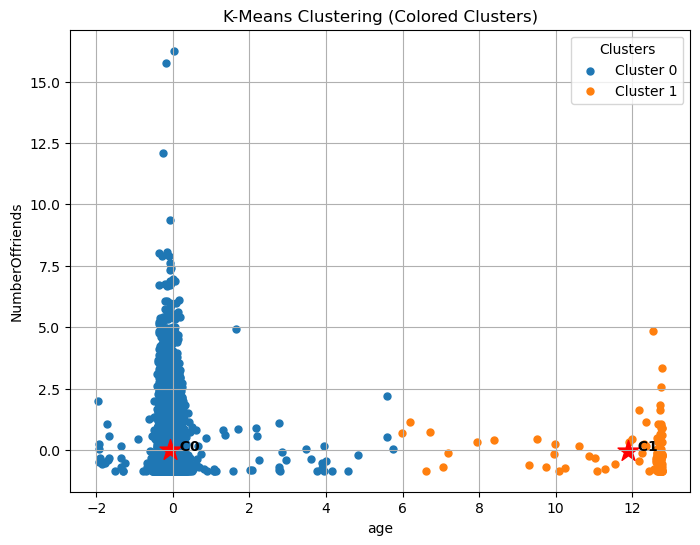

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

x_col = "age"
y_col = "NumberOffriends"

X2 = df[[x_col, y_col]].copy()
X2 = X2.apply(pd.to_numeric, errors="coerce").fillna(0)

X2_scaled = StandardScaler().fit_transform(X2)

kmeans2 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans2.fit_predict(X2_scaled)

centers = kmeans2.cluster_centers_

plt.figure(figsize=(8, 6))


for c in range(best_k):
    plt.scatter(
        X2_scaled[labels == c, 0],
        X2_scaled[labels == c, 1],
        label=f"Cluster {c}",
        s=25
    )


for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], marker='*', c='red', s=250)
    plt.text(center[0], center[1], f"  C{i}", fontsize=10, weight="bold")  # اسم المركز

plt.grid(True)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("K-Means Clustering (Colored Clusters)")
plt.legend(title="Clusters")
plt.show()


In [25]:
cols_10 = [
    "gradyear","gender","age","NumberOffriends",
    "basketball","football","soccer","music",
    "shopping","drugs"
]

print("Outliers check using IQR:\n")

for col in cols_10:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()

    print(f"{col:20s} → Outliers = {outliers_count}")

Outliers check using IQR:

gradyear             → Outliers = 0
gender               → Outliers = 2606
age                  → Outliers = 201
NumberOffriends      → Outliers = 569
basketball           → Outliers = 2412
football             → Outliers = 2499
soccer               → Outliers = 1531
music                → Outliers = 945
shopping             → Outliers = 315
drugs                → Outliers = 654
